In [639]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/skillenza-1/test.csv
/kaggle/input/skillenza-1/train.csv


In [640]:
#importing needed libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

col_list = ['#cc615c', '#6965a7', '#f1bdbf']
sns.set_palette(col_list)

In [641]:
#fetching datasets
train=pd.read_csv("/kaggle/input/skillenza-1/train.csv")
test=pd.read_csv("/kaggle/input/skillenza-1/test.csv")

In [642]:
train.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,BRONZE,6,YES,NO,A40,1169,A65,NaN,A75,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,SILVER,48,YES,YES,A40,5951,A61,72.0,A73,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,NaN,12,YES,NO,A46,2096,A61,68.0,A74,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,BRONZE,42,YES,YES,A40,7882,A61,73.0,A74,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,BRONZE,24,YES,NO,A40,4870,A61,52.0,A73,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [643]:
test.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,NaN,12,YES,YES,A40,A63,517.0,A73,1134,...,4,A123,29,A143,A151,1,A172,1,A191,A201
1,2,BRONZE,48,YES,NO,A40,A61,18.0,A75,783,...,4,A124,46,A143,A153,2,A173,1,A192,A201
2,3,GOLD,24,YES,YES,A40,A62,389.0,A75,1181,...,2,A124,47,A143,A153,1,A173,1,A192,A201
3,4,SILVER,30,YES,NO,A49,A62,326.0,A75,853,...,2,A122,41,A142,A152,2,A173,1,A191,A201
4,5,SILVER,27,YES,YES,A49,A61,16.0,A72,888,...,1,A122,32,A143,A152,1,A173,2,A192,A201


In [644]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 25 columns):
serial number       700 non-null int64
account_info        427 non-null object
duration_month      700 non-null int64
Loan                700 non-null object
Regularity          700 non-null object
Purpose             700 non-null object
credit_amount       700 non-null int64
savings_account     700 non-null object
Saving Account      580 non-null float64
employment_st       700 non-null object
Salary              700 non-null int64
investment          700 non-null float64
Gender              700 non-null object
Status              700 non-null object
gurantors           700 non-null object
resident_since      700 non-null int64
property_type       700 non-null object
age                 700 non-null int64
installment_type    700 non-null object
housing_type        700 non-null object
credits_no          700 non-null int64
job_type            700 non-null object
liables             

In [645]:
train.describe()

,serial number,duration_month,credit_amount,Saving Account,Salary,investment,resident_since,age,credits_no,liables
count,700.00000,700.000000,700.000000,580.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,20.652857,3182.331429,265.208621,1610.258571,39.365286,2.808571,35.322857,1.392857,1.148571
std,202.21688,12.279683,2725.319217,569.396113,784.923838,6.784642,1.114573,11.319842,0.572328,0.355920
min,1.00000,4.000000,276.000000,1.000000,700.000000,26.010000,1.000000,19.000000,1.000000,1.000000
25%,175.75000,12.000000,1350.750000,34.000000,953.500000,33.742500,2.000000,27.000000,1.000000,1.000000
50%,350.50000,18.000000,2253.000000,70.000000,1265.500000,39.570000,3.000000,33.000000,1.000000,1.000000
75%,525.25000,24.000000,3913.250000,137.500000,2198.250000,44.765000,4.000000,41.000000,2.000000,1.000000
max,700.00000,72.000000,15945.000000,3791.000000,3499.000000,53.610000,4.000000,75.000000,4.000000,2.000000


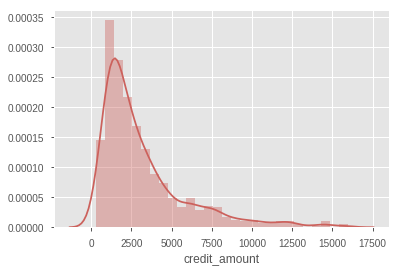

In [646]:
#plotting the variable to be predicted
sns.distplot(train.credit_amount)

In [647]:
#to check the percentage of nan values
(train.isna().sum()/len(train))*100

serial number        0.000000
account_info        39.000000
duration_month       0.000000
Loan                 0.000000
Regularity           0.000000
Purpose              0.000000
credit_amount        0.000000
savings_account      0.000000
Saving Account      17.142857
employment_st        0.000000
Salary               0.000000
investment           0.000000
Gender               0.000000
Status               0.000000
gurantors            0.000000
resident_since       0.000000
property_type        0.000000
age                  0.000000
installment_type     0.000000
housing_type         0.000000
credits_no           0.000000
job_type             0.000000
liables              0.000000
telephone            0.000000
foreigner            0.000000
dtype: float64

In [648]:
#to check the percentage of nan values
(test.isna().sum()/len(test))*100

serial number        0.000000
account_info        40.333333
duration_month       0.000000
Loan                 0.000000
Regularity           0.000000
Purpose              0.000000
savings_account      0.000000
Saving Account      21.000000
employment_st        0.000000
Salary               0.000000
investment           0.000000
Gender               0.000000
Status               0.000000
gurantors            0.000000
resident_since       0.000000
property_type        0.000000
age                  0.000000
installment_type     0.000000
housing_type         0.000000
credits_no           0.000000
job_type             0.000000
liables              0.000000
telephone            0.000000
foreigner            0.000000
dtype: float64

In [649]:
#imputing values for Saving Account column
train = train.fillna(train['Saving Account'].value_counts().index[0])
test = test.fillna(test['Saving Account'].value_counts().index[0])

In [650]:
#to check the percentage of nan values
(train.isna().sum()/len(train))*100

serial number       0.0
account_info        0.0
duration_month      0.0
Loan                0.0
Regularity          0.0
Purpose             0.0
credit_amount       0.0
savings_account     0.0
Saving Account      0.0
employment_st       0.0
Salary              0.0
investment          0.0
Gender              0.0
Status              0.0
gurantors           0.0
resident_since      0.0
property_type       0.0
age                 0.0
installment_type    0.0
housing_type        0.0
credits_no          0.0
job_type            0.0
liables             0.0
telephone           0.0
foreigner           0.0
dtype: float64

In [651]:
#to check the percentage of nan values
(test.isna().sum()/len(test))*100

serial number       0.0
account_info        0.0
duration_month      0.0
Loan                0.0
Regularity          0.0
Purpose             0.0
savings_account     0.0
Saving Account      0.0
employment_st       0.0
Salary              0.0
investment          0.0
Gender              0.0
Status              0.0
gurantors           0.0
resident_since      0.0
property_type       0.0
age                 0.0
installment_type    0.0
housing_type        0.0
credits_no          0.0
job_type            0.0
liables             0.0
telephone           0.0
foreigner           0.0
dtype: float64

In [652]:
test.select_dtypes(include=['object']).columns

Index(['account_info', 'Loan', 'Regularity', 'Purpose', 'savings_account',
       'employment_st', 'Gender', 'Status', 'gurantors', 'property_type',
       'installment_type', 'housing_type', 'job_type', 'telephone',
       'foreigner'],
      dtype='object')

In [653]:
train.select_dtypes(include=['object']).columns

Index(['account_info', 'Loan', 'Regularity', 'Purpose', 'savings_account',
       'employment_st', 'Gender', 'Status', 'gurantors', 'property_type',
       'installment_type', 'housing_type', 'job_type', 'telephone',
       'foreigner'],
      dtype='object')

In [654]:
## converting Categorical Data into proper forms except account_info
list1 =['account_info', 'Loan', 'Regularity', 'Purpose', 'savings_account',
       'employment_st', 'Gender', 'Status', 'gurantors', 'property_type',
       'installment_type', 'housing_type', 'job_type', 'telephone',
       'foreigner']

for col in list1:
    train[col] = train[col].astype('category')

### from category to int labels
for col in list1:
    train[col] = train[col].cat.codes

In [655]:
#CHANGING TYPE OF THE COLUMNS : account_info and Saving Account
## converting Categorical Data into proper forms except account_info
list1 =['account_info', 'Loan', 'Regularity', 'Purpose', 'savings_account',
       'employment_st', 'Gender', 'Status', 'gurantors', 'property_type',
       'installment_type', 'housing_type', 'job_type', 'telephone',
       'foreigner']

for col in list1:
    test[col] = test[col].astype('category')

### from category to int labels
for col in list1:
    test[col] = test[col].cat.codes

In [656]:
#to drop column serial number from train dataset
train=train.drop(['serial number'], axis=1)

In [657]:
#to drop column serial number from test dataset
test=test.drop(['serial number'], axis=1)

([<matplotlib.axis.YTick at 0x7fb6ebeb7eb8>,
 <a list of 9 Text yticklabel objects>)

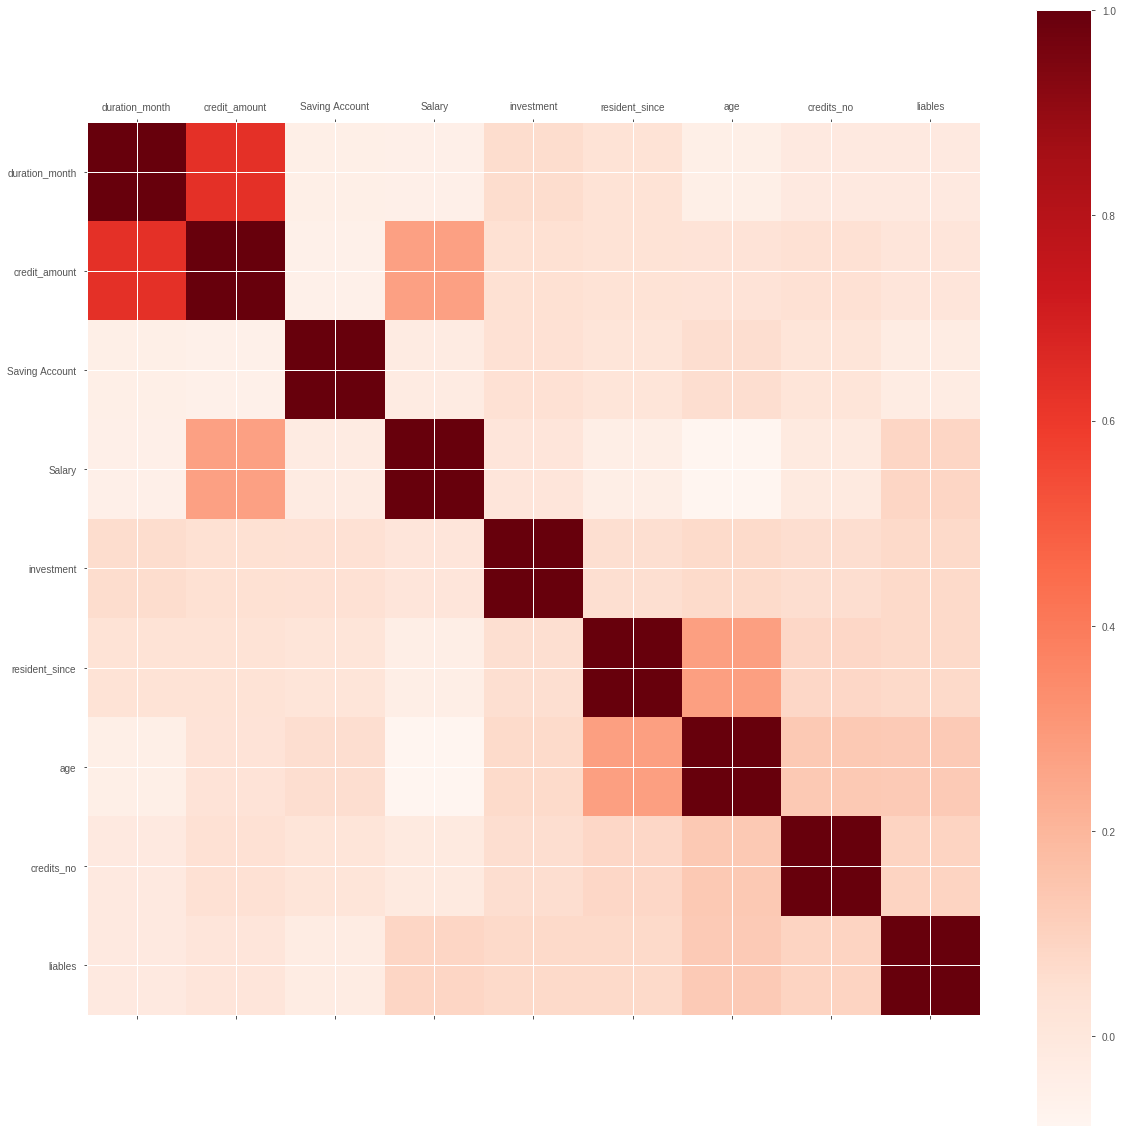

In [658]:
numeric_train = train.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20,20))
plt.matshow(numeric_train.corr(), cmap=plt.cm.Reds, fignum=1)
plt.colorbar()
tick_marks = [i for i in range(len(numeric_train.columns))]
plt.xticks(tick_marks, numeric_train.columns)
plt.yticks(tick_marks, numeric_train.columns)

Status
0    AxesSubplot(0.555556,0.125;0.344444x0.328261)
1    AxesSubplot(0.555556,0.125;0.344444x0.328261)
2    AxesSubplot(0.555556,0.125;0.344444x0.328261)
Name: credit_amount, dtype: object

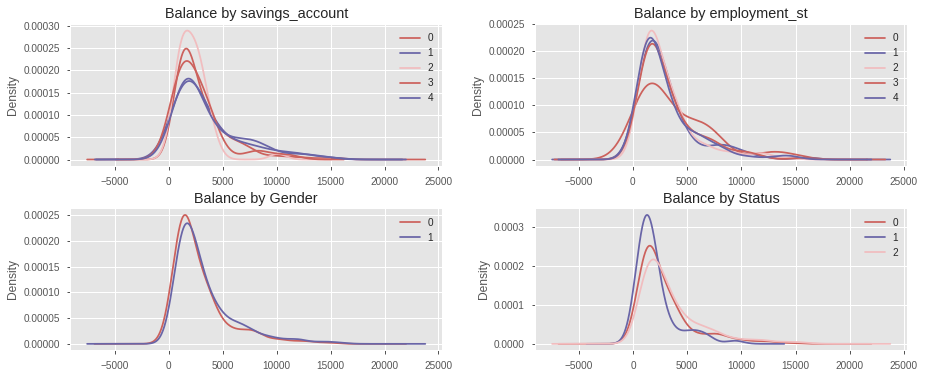

In [659]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=.3, wspace=.25)
train.groupby('savings_account').credit_amount.plot(kind='kde', ax=axes[0][0], legend=True, title='Balance by savings_account')
train.groupby('employment_st').credit_amount.plot(kind='kde', ax=axes[0][1], legend=True, title='Balance by employment_st')
train.groupby('Gender').credit_amount.plot(kind='kde', ax=axes[1][0], legend=True, title='Balance by Gender')
train.groupby('Status').credit_amount.plot(kind='kde', ax=axes[1][1], legend=True, title='Balance by Status')


In [660]:
#viewing the dataset with the help of PROFILER
import pandas_profiling

pandas_profiling.ProfileReport(train)

#extracting profiler report in html 
#profile1 = pandas_profiling.ProfileReport(master_data_final)
#profile1.to_file(outputfile="Trade_Report_India.html")

In [661]:
#from sklearn.preprocessing import Imputer 
#from fancyimpute import IterativeImputer as MICE
#data_imp=fancyimpute.MICE().complete(train)

#fancy impute removes column names.
#train_cols = list(train)
# Use MICE to fill in each row's missing features
#train = pd.DataFrame(MICE(verbose=False).complete(train))
#train.columns = train_cols

In [662]:
#from sklearn.ensemble import GradientBoostingRegressor
#import numpy as np
#import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
#from sklearn.datasets import load_boston
#from sklearn.metrics import mean_absolute_error

In [663]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
#X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
#regr = AdaBoostRegressor(random_state=0, n_estimators=100)
#regr.fit(X, y)
#AdaBoostRegressor(n_estimators=100, random_state=0)
#regr.feature_importances_array([0.2788..., 0.7109..., 0.0065..., 0.0036...])
#regr.predict([[0, 0, 0, 0]])
#array([4.7972...])
#regr.score(X, y)
#0.9771...

In [664]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 24 columns):
account_info        700 non-null int8
duration_month      700 non-null int64
Loan                700 non-null int8
Regularity          700 non-null int8
Purpose             700 non-null int8
credit_amount       700 non-null int64
savings_account     700 non-null int8
Saving_Account      700 non-null float64
employment_st       700 non-null int8
Salary              700 non-null int64
investment          700 non-null float64
Gender              700 non-null int8
Status              700 non-null int8
gurantors           700 non-null int8
resident_since      700 non-null int64
property_type       700 non-null int8
age                 700 non-null int64
installment_type    700 non-null int8
housing_type        700 non-null int8
credits_no          700 non-null int64
job_type            700 non-null int8
liables             700 non-null int64
telephone           700 non-null int8
foreigne

In [668]:
train.columns

Index(['account_info', 'duration_month', 'Loan', 'Regularity', 'Purpose',
       'credit_amount', 'savings_account', 'Saving_Account', 'employment_st',
       'Salary', 'investment', 'Gender', 'Status', 'gurantors',
       'resident_since', 'property_type', 'age', 'installment_type',
       'housing_type', 'credits_no', 'job_type', 'liables', 'telephone',
       'foreigner'],
      dtype='object')

In [669]:
X=train[[ 'account_info', 'duration_month', 'Loan', 'Regularity',
       'Purpose', 'savings_account','Saving_Account',
       'employment_st', 'Salary', 'investment', 'Gender', 'Status',
       'gurantors', 'resident_since', 'property_type', 'age',
       'installment_type', 'housing_type', 'credits_no', 'job_type', 'liables',
       'telephone', 'foreigner']]
y=train[['credit_amount']]

In [670]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)


***********************to use Adaboost Regressor in Python************************

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=100, random_state=None)

0.5399944244509003

0.299593660102547


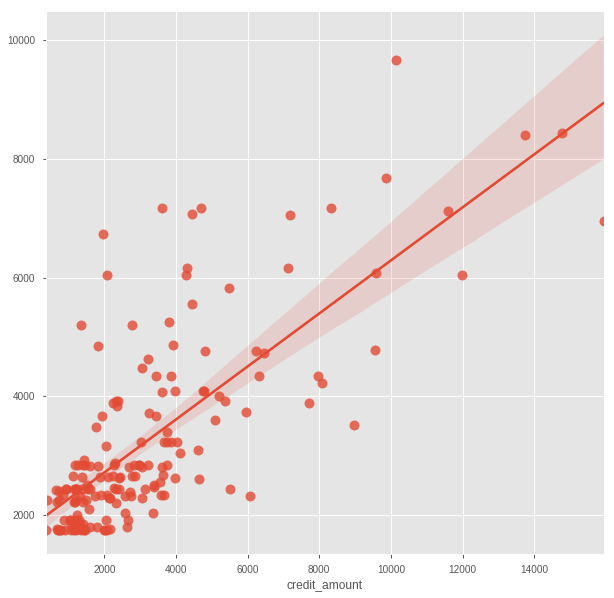

In [671]:
#ada Boosting on validation set
def Snippet_162():
    print()
    print(format('to use Adaboost Regressor in Python','*^82'))

    import warnings
    warnings.filterwarnings("ignore")

    # load libraries
    from sklearn import datasets
    from sklearn import metrics
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.ensemble import AdaBoostRegressor
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.style.use('ggplot')

    model = AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',n_estimators=100, random_state=None)
    model.fit(train_X, train_y)
    print(); print(model)

    # make predictions
    expected_y  = test_y
    predicted_y = model.predict(test_X)

    # summarize the fit of the model
    print(); print(metrics.r2_score(expected_y, predicted_y))
    print(); print(metrics.mean_squared_log_error(expected_y, predicted_y))

    # plot regression
    plt.figure(figsize=(10,10))
    sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

Snippet_162()

In [672]:
#ada Boosting on test data set   
    model = AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',n_estimators=100, random_state=None)
    model.fit(train_X, train_y)
    print(); print(model)

    # make predictions
    expected_y  = test_y
    predicted_y = model.predict(test)


AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=100, random_state=None)


In [ ]:
predicted_y

In [ ]:
val = [round(x) for x in predicted_y]

In [ ]:
len(val)

In [ ]:
test_serial_number=pd.read_csv("/kaggle/input/skillenza-1/test.csv")

In [ ]:
test_serial_number.columns

In [ ]:
test_serial_number=test_serial_number.drop(['account_info', 'duration_month', 'Loan', 'Regularity',
       'Purpose', 'savings_account', 'Saving Account', 'employment_st',
       'Salary', 'investment', 'Gender', 'Status', 'gurantors',
       'resident_since', 'property_type', 'age', 'installment_type',
       'housing_type', 'credits_no', 'job_type', 'liables', 'telephone',
       'foreigner'], axis=1)

In [ ]:
submission = pd.concat([test_serial_number['serial number'], pd.DataFrame(val,columns=['credit_amount'])], axis=1)

In [ ]:
submission = submission.rename(columns={"serial number": "S.no"})

In [ ]:
submission

In [ ]:
submission.to_csv('submission_final_ada_boost.csv', index=False)